In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# 下载并载入数据
# 训练集数据(50000, 32, 32, 3)
# 测试集数据(50000, 1)
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

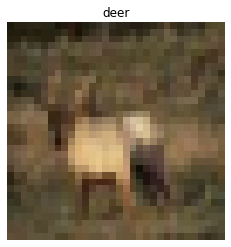

In [4]:
# 显示1张图片
# 第3张图片
n = 3
# 一共10个种类
target_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# 显示图片
plt.imshow(x_train[n])
plt.axis('off')
# 根据标签获得种类名称
plt.title(target_name[y_train[n][0]])
plt.show()

In [5]:
# 数据归一化
x_train = x_train/255.0
x_test = x_test/255.0
# 转one hot格式
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [6]:
# 定义卷积网络
model = Sequential()
model.add(Convolution2D(input_shape=(32,32,3), filters=32, kernel_size=3, strides=1, padding='same', activation = 'relu'))
model.add(Convolution2D(filters=32, kernel_size=3, strides=1, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.2))
model.add(Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation = 'relu'))
model.add(Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.3))
model.add(Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation = 'relu'))
model.add(Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

# 定义优化器
adam = Adam(lr=1e-4)

# 定义优化器，loss function，训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
# 训练模型
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 181us/sample - loss: 1.9268 - acc: 0.2873 - val_loss: 1.6186 - val_acc: 0.4077
Epoch 2/100
50000/50000 [==============================] - 6s 127us/sample - loss: 1.5641 - acc: 0.4284 - val_loss: 1.4547 - val_acc: 0.4748
Epoch 3/100
50000/50000 [==============================] - 6s 126us/sample - loss: 1.4103 - acc: 0.4897 - val_loss: 1.2902 - val_acc: 0.5436
Epoch 4/100
50000/50000 [==============================] - 6s 127us/sample - loss: 1.3173 - acc: 0.5269 - val_loss: 1.2275 - val_acc: 0.5588
Epoch 5/100
50000/50000 [==============================] - 6s 126us/sample - loss: 1.2345 - acc: 0.5598 - val_loss: 1.1318 - val_acc: 0.6018
Epoch 6/100
50000/50000 [==============================] - 6s 126us/sample - loss: 1.1735 - acc: 0.5833 - val_loss: 1.1243 - val_acc: 0.6072
Epoch 7/100
50000/50000 [==============================] - 6s 127us/sample - loss: 1.1172 - acc: 0.6028 